## Error Corrected At End Qubit Adder

In [ ]:
%load_ext autoreload
%autoreload 2

import qiskit
import common
import gates
import constants


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def logical_register(name: str) -> list:
    return [qiskit.QuantumRegister(1, name), qiskit.QuantumRegister(8, f"{name}l")]


# Create quantum registers
creq_ce = []
areq_ce = []
breq_ce = []
for i in range(constants.bits):
    creq_ce.append(logical_register(f"c{i}"))
    areq_ce.append(logical_register(f"a{i}"))
    breq_ce.append(logical_register(f"b{i}"))
breq_ce.append(logical_register(f"b{constants.bits}"))

# Combine quantum registers into a single list
req_ce = []
for i in range(constants.bits):
    req_ce.extend(creq_ce[i])
    req_ce.extend(areq_ce[i])
    req_ce.extend(breq_ce[i])
req_ce.extend(breq_ce[constants.bits])



classical_req_ec = qiskit.ClassicalRegister(constants.bits + 1, "result")
qc_ce = qiskit.QuantumCircuit(*req_ce, classical_req_ec)

# Add shor setup
for i in range(constants.bits):
    qc_ce = gates.add_shor_setup(qc_ce, creq_ce[i])
    qc_ce = gates.add_shor_setup(qc_ce, areq_ce[i])
    qc_ce = gates.add_shor_setup(qc_ce, breq_ce[i])
qc_ce = gates.add_shor_setup(qc_ce, breq_ce[constants.bits])

# Add X gates to set the initial values
for i in range(constants.bits):
    if constants.a[::-1][i] == "1":
        qc_ce = gates.add_x(qc_ce, areq_ce[i])
    if constants.b[::-1][i] == "1":
        qc_ce = gates.add_x(qc_ce, breq_ce[i])


# Add the carry and sum gates
for i in range(constants.bits):
    if i != constants.bits - 1:
        qc_ce = gates.add_carry(qc_ce, creq_ce[i], areq_ce[i], breq_ce[i], creq_ce[i + 1])
    else:
        qc_ce = gates.add_carry(qc_ce, creq_ce[i], areq_ce[i], breq_ce[i], breq_ce[i + 1])
        qc_ce = gates.add_cx(qc_ce, areq_ce[i], breq_ce[i])

for i in reversed(range(constants.bits)):
    qc_ce = gates.add_sum(qc_ce, creq_ce[i], areq_ce[i], breq_ce[i])

    if i != 0:
        qc_ce = gates.add_reverse_carry(qc_ce, creq_ce[i - 1], areq_ce[i - 1], breq_ce[i - 1], creq_ce[i])

for i in range(constants.bits):
    qc_ce = gates.add_shor_teardown(qc_ce, creq_ce[i])
    qc_ce = gates.add_shor_teardown(qc_ce, areq_ce[i])
    qc_ce = gates.add_shor_teardown(qc_ce, breq_ce[i])
qc_ce = gates.add_shor_teardown(qc_ce, breq_ce[constants.bits])

print(f"{qc_ce.num_qubits} qubits used")

for i in range(constants.bits + 1):
    qc_ce.measure(breq_ce[i][0], classical_req_ec[i])

# qc_ce.draw("mpl")

117 qubits used


In [ ]:
raise common.StopExecution

simulator_ce = common.SimulatedQuantumComputer(qc_ce, 512)
counts_ce = simulator_ce.run()
print(f"Sum: {simulator_ce.most_common()}")

Backend: ibm_brisbane
Most likely state: 00010


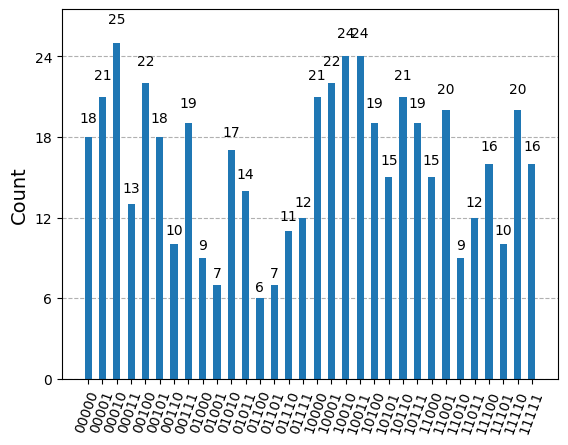

In [ ]:
raise common.StopExecution

simulator_ce = common.RealQuantumComputer(qc_ce, 512)
counts_ce = simulator_ce.run("result")
print(f"Backend: {simulator_ce.backend_name()}")
print(f"Most likely state: {simulator_ce.most_common()}")
simulator_ce.plot()